# Data Science and Business Intelligence Internship
Task 2: Prediction using Unsupervised ML.

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

Use R or Python to perform this task

In [37]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [38]:
df=pd.read_csv(r"C:\Users\yadav\OneDrive\Desktop\Internship\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [40]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [41]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [42]:
df.shape

(150, 6)

In [43]:
import seaborn as sns

<AxesSubplot:>

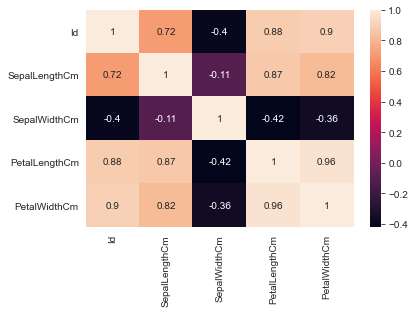

In [44]:
sns.heatmap(df.corr(),annot=True)

# Preprocessing

In [45]:
x=df.drop(columns=['Id','Species'],axis=1)
y=df.Species

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
from sklearn.cluster import KMeans

In [49]:
wcss=[]

In [50]:
OMP_NUM_THREADS=1
for i in range(1,10):
    kmeans=KMeans(n_clusters = i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

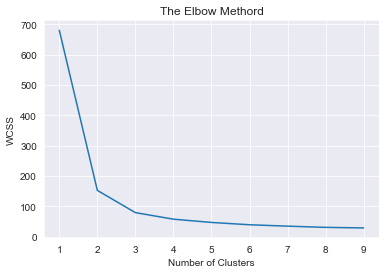

In [51]:
sns.set_style("darkgrid")
plt.plot(range(1,10),wcss)
plt.title('The Elbow Methord')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
model= KMeans(n_clusters = 3, random_state = 1)
y_pred = model.fit_predict(x)
x=x.values

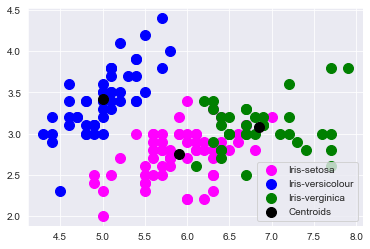

In [53]:
# visualizing the clusters- On the first two columns
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'magenta', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'green', label = 'Iris-verginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()